<a name='0_0'></a>
# <span style="color:#ff5f27">👨🏻‍🏫 CNN with Keras </span>

🗄️ Table of Contents:

- [📝 Imports](#0)
- [🗄️ Data Loading](#1)
- [👨🏻‍🏭 Normalization + Split](#2)
- [👩🏻‍🔬 Experiments](#3)
- [🤖 Final Model](#4)
- [👮🏻‍♂️ Model Validation](#5)
- [⚙️ LeNet-5](#6)

<a name='0'></a>
## <span style="color:#ff5f27">📝 Imports </span>

In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import random

from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix 
import itertools 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D 
from keras.optimizers import RMSprop, Adam, SGD
from keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import ReduceLROnPlateau 
from tensorflow.random import set_seed

import warnings 
warnings.filterwarnings('ignore') 

<a name='1'></a>

## <span style="color:#ff5f27">🗄️ Data Loading </span>

- [🗄️ Table of Contents](#0_0)

In [68]:
train = pd.read_csv("data/train.csv") 
print(train.shape) 
train.head(3) 

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
test = pd.read_csv("data/test.csv") 
print(test.shape) 
test.head(3) 

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# put labels into y_train variable 
Y_train = train["label"] 
# Drop 'label' column 
X_train = train.drop(labels = ["label"],axis = 1) 

### <span style="color:#ff5f27">👨🏻‍🎨 Visualization </span>

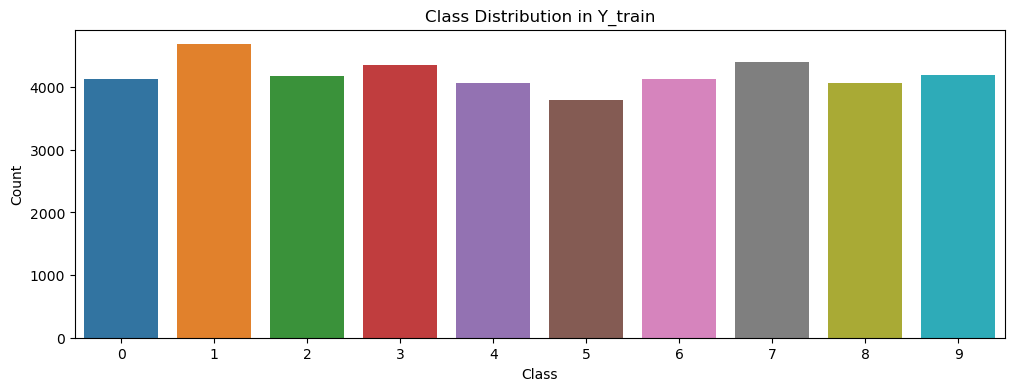

In [71]:
# Create a count plot
plt.figure(figsize=(12, 4))
sns.countplot(x=Y_train)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Y_train')

# Show the plot
plt.show()

In [72]:
def plot_image(index, data=X_train, figsize=(8, 3), cmap='gray'):
    plt.figure(figsize=figsize)
    image = data.iloc[index].values.reshape(28, 28)
    plt.imshow(image, cmap=cmap)
    plt.title(f"Digit: {train.iloc[index,0]}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

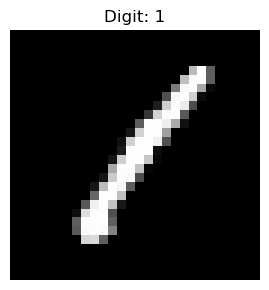

In [73]:
plot_image(0)

<a name='2'></a>
## <span style="color:#ff5f27">👨🏻‍🏭 Normalization + Split </span>
- [🗄️ Table of Contents](#0_0)

In [74]:
# Normalize the data 
X_train = X_train / 255.0 
test = test / 255.0 
print("x_train shape: ",X_train.shape) 
print("test shape: ",test.shape) 

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [75]:
# Reshape 
X_train = X_train.values.reshape(-1,28,28,1) 
test = test.values.reshape(-1,28,28,1) 
print("x_train shape: ",X_train.shape) 
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [76]:
Y_train = to_categorical(Y_train, num_classes = 10) 
print(Y_train.shape)
Y_train[0]

(42000, 10)


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [77]:
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, 
    Y_train, 
    test_size=0.1, 
    random_state=2,
) 

print("x_train shape",X_train.shape) 
print("x_test shape",X_val.shape) 
print("y_train shape",Y_train.shape) 
print("y_test shape",Y_val.shape) 

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


## <span style="color:#ff5f27">🧬 Data Augmentation </span>

In [78]:
datagen = ImageDataGenerator( 
    featurewise_center=False,             # set input mean to 0 over the dataset
    samplewise_center=False,              # set each sample mean to 0 
    featurewise_std_normalization=False,  # divide inputs by std of the dataset  
    samplewise_std_normalization=False,   # divide each input by its std  
    zca_whitening=False,                  # dimesion reduction 
    rotation_range=0.5,                   # randomly rotate images in the range 5 degrees  
    zoom_range=0.5,                       # Randomly zoom image 5% 
    width_shift_range=0.5,                # randomly shift images horizontally 5%  
    height_shift_range=0.5,               # randomly shift images vertically 5%  
    horizontal_flip=False,                # randomly flip images 
    vertical_flip=False,                  # randomly flip images 
)
datagen.fit(X_train) 

---
<a name='3'></a>
## <span style="color:#ff5f27">👩🏻‍🔬 Experiments </span>
- [🗄️ Table of Contents](#0_0)

In [13]:
def reset_seeds(seed_value=24):
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    np.random.seed(seed_value) 
    random.seed(seed_value)
    set_seed(seed_value)

In [14]:
def plot_loss_and_accuracy(history, scores_df, model_name):
    
    train_accuracy = history.history["accuracy"][-1]
    val_accuracy = history.history["val_accuracy"][-1]

    scores_df = scores_df.append(
        {
            'model_name': model_name, 
             'train_accuracy': train_accuracy, 
            'val_accuracy': val_accuracy,
        }, ignore_index=True,
    )
    
    print(f'🎯 Train Accuracy: {train_accuracy}')
    print(f'🎯 Val Accuracy: {val_accuracy}')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['loss'], label="train loss")
    ax1.plot(history.history['val_loss'], label="validation loss")
    ax1.set_title("Loss")
    ax1.set_xlabel("Number of Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()

    ax2.plot(history.history['accuracy'], label="train accuracy")
    ax2.plot(history.history['val_accuracy'], label="validation accuracy")
    ax2.set_title("Accuracy")
    ax2.set_xlabel("Number of Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.legend()

    plt.show()
    
    return scores_df

In [15]:
EPOCHS = 10
BATCH_SIZE = 250 

In [16]:
scores_df = pd.DataFrame(columns=['model_name', 'train_accuracy', 'val_accuracy'])
scores_df

,model_name,train_accuracy,val_accuracy


### <span style="color:#ff5f27">⚙️ Optimizers </span>

In [17]:
def create_default_model():
    model = Sequential() 

    model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1),)) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(Dropout(0.25)) 
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu',)) 
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
    model.add(Dropout(0.25)) 

    model.add(Flatten()) 
    model.add(Dense(256, activation="relu")) 
    model.add(Dropout(0.5)) 
    model.add(Dense(10, activation="softmax")) 
    
    return model

In [18]:
reset_seeds()

# Create a model
model_default = create_default_model()

# Define the optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model 
model_default.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

2023-10-11 23:39:12.008694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
history_default = model_default.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 12s 77ms/step - loss: 2.1739 - accuracy: 0.1942 - val_loss: 1.6529 - val_accuracy: 0.3971
Epoch 2/10
151/151 [==============================] - 11s 76ms/step - loss: 1.8631 - accuracy: 0.3398 - val_loss: 1.1550 - val_accuracy: 0.6821
Epoch 3/10
151/151 [==============================] - 12s 76ms/step - loss: 1.6849 - accuracy: 0.4130 - val_loss: 0.8200 - val_accuracy: 0.8024
Epoch 4/10
151/151 [==============================] - 12s 76ms/step - loss: 1.5764 - accuracy: 0.4528 - val_loss: 0.6223 - val_accuracy: 0.8619
Epoch 5/10
151/151 [==============================] - 11s 76ms/step - loss: 1.4894 - accuracy: 0.4902 - val_loss: 0.4849 - val_accuracy: 0.8940
Epoch 6/10
151/151 [==============================] - 12s 76ms/step - loss: 1.4404 - accuracy: 0.5052 - val_loss: 0.4374 - val_accuracy: 0.8905
Epoch 7/10
151/151 [==============================] - 12s 76ms/step - loss: 1.3921 - accuracy: 0.5204 - val_loss: 0.3720 - val_accuracy:

🎯 Train Accuracy: 0.5590945482254028
🎯 Val Accuracy: 0.9252380728721619


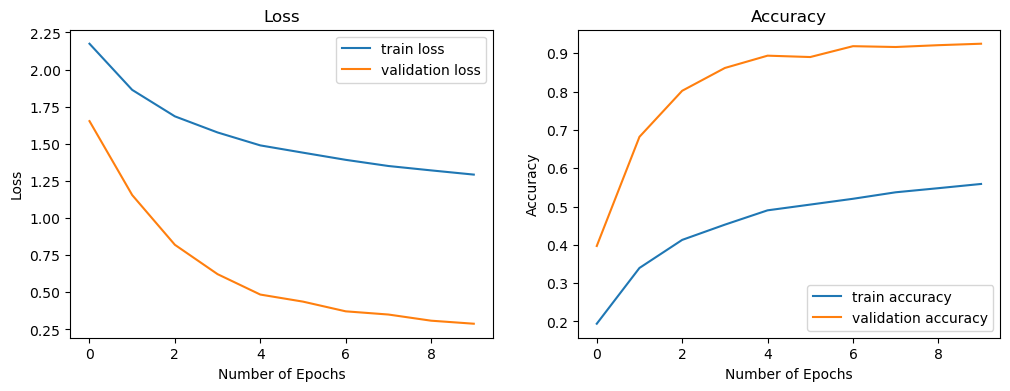

In [20]:
scores_df = plot_loss_and_accuracy(history_default, scores_df, 'Adam_model')

In [21]:
reset_seeds()

# Create a model
model_sgd = create_default_model()

# Define the optimizer 
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model 
model_sgd.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

In [22]:
history_sgd = model_sgd.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 12s 78ms/step - loss: 2.2996 - accuracy: 0.1244 - val_loss: 2.2776 - val_accuracy: 0.2379
Epoch 2/10
151/151 [==============================] - 15s 97ms/step - loss: 2.2734 - accuracy: 0.1615 - val_loss: 2.1968 - val_accuracy: 0.1888
Epoch 3/10
151/151 [==============================] - 18s 117ms/step - loss: 2.1974 - accuracy: 0.1952 - val_loss: 2.0675 - val_accuracy: 0.2750
Epoch 4/10
151/151 [==============================] - 14s 94ms/step - loss: 2.1333 - accuracy: 0.2122 - val_loss: 1.9756 - val_accuracy: 0.3231
Epoch 5/10
151/151 [==============================] - 13s 84ms/step - loss: 2.0885 - accuracy: 0.2337 - val_loss: 1.8481 - val_accuracy: 0.3188
Epoch 6/10
151/151 [==============================] - 15s 99ms/step - loss: 2.0432 - accuracy: 0.2559 - val_loss: 1.7163 - val_accuracy: 0.4867
Epoch 7/10
151/151 [==============================] - 13s 85ms/step - loss: 1.9848 - accuracy: 0.2844 - val_loss: 1.5821 - val_accuracy

🎯 Train Accuracy: 0.36508655548095703
🎯 Val Accuracy: 0.6504762172698975


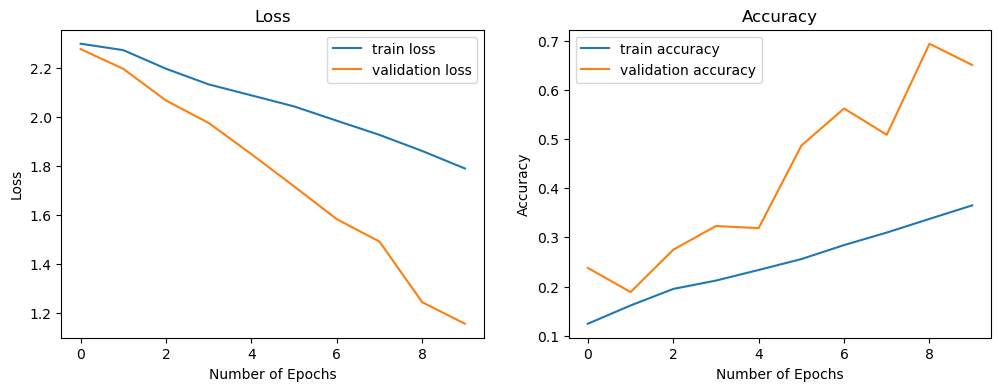

In [23]:
scores_df = plot_loss_and_accuracy(history_sgd, scores_df, 'SGD_model')

In [24]:
reset_seeds()

# Create a model
model_rmsp = create_default_model()

# Define the optimizer 
optimizer = RMSprop(learning_rate=0.001)

# Compile the model 
model_rmsp.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

In [25]:
history_rmsp = model_rmsp.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 13s 84ms/step - loss: 2.1540 - accuracy: 0.2071 - val_loss: 1.6693 - val_accuracy: 0.4790
Epoch 2/10
151/151 [==============================] - 13s 87ms/step - loss: 1.9092 - accuracy: 0.3197 - val_loss: 1.2287 - val_accuracy: 0.6662
Epoch 3/10
151/151 [==============================] - 14s 92ms/step - loss: 1.7540 - accuracy: 0.3862 - val_loss: 1.0132 - val_accuracy: 0.6848
Epoch 4/10
151/151 [==============================] - 12s 81ms/step - loss: 1.6519 - accuracy: 0.4250 - val_loss: 0.7328 - val_accuracy: 0.8264
Epoch 5/10
151/151 [==============================] - 13s 85ms/step - loss: 1.5653 - accuracy: 0.4623 - val_loss: 0.6171 - val_accuracy: 0.8479
Epoch 6/10
151/151 [==============================] - 12s 80ms/step - loss: 1.5155 - accuracy: 0.4789 - val_loss: 0.5484 - val_accuracy: 0.8657
Epoch 7/10
151/151 [==============================] - 13s 86ms/step - loss: 1.4639 - accuracy: 0.4954 - val_loss: 0.4738 - val_accuracy:

🎯 Train Accuracy: 0.539334237575531
🎯 Val Accuracy: 0.9061904549598694


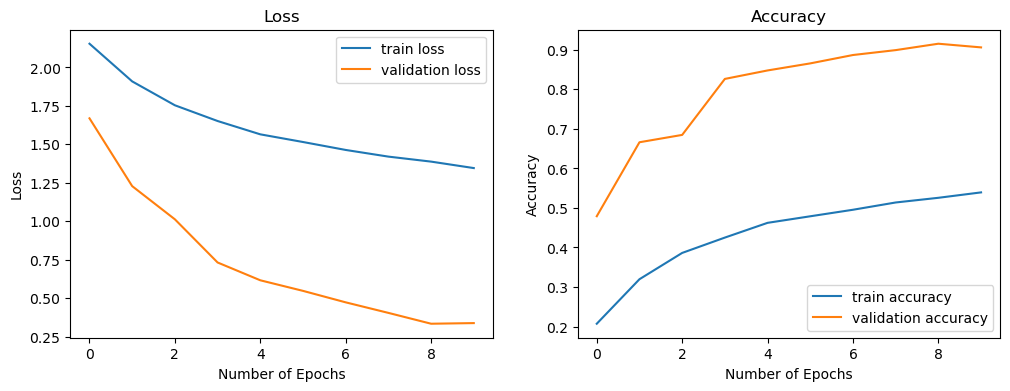

In [26]:
scores_df = plot_loss_and_accuracy(history_rmsp, scores_df, 'RMSprop_model')

In [27]:
scores_df

,model_name,train_accuracy,val_accuracy
0,Adam_model,0.559095,0.925238
1,SGD_model,0.365087,0.650476
2,RMSprop_model,0.539334,0.906190


### <span style="color:#ff5f27">🕋 Filters </span>

In [28]:
reset_seeds()
model_kernel3 = Sequential() 

model_kernel3.add(Conv2D(filters=8, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(28,28,1),)) 
model_kernel3.add(MaxPool2D(pool_size=(2,2))) 
model_kernel3.add(Dropout(0.25)) 
model_kernel3.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu',)) 
model_kernel3.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
model_kernel3.add(Dropout(0.25)) 

model_kernel3.add(Flatten()) 
model_kernel3.add(Dense(256, activation="relu")) 
model_kernel3.add(Dropout(0.5)) 
model_kernel3.add(Dense(10, activation="softmax")) 

In [29]:
# Define the optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model 
model_kernel3.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

In [30]:
history_kernel3 = model_kernel3.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 12s 74ms/step - loss: 2.1906 - accuracy: 0.1907 - val_loss: 1.7373 - val_accuracy: 0.3800
Epoch 2/10
151/151 [==============================] - 12s 78ms/step - loss: 1.9226 - accuracy: 0.3107 - val_loss: 1.3179 - val_accuracy: 0.5888
Epoch 3/10
151/151 [==============================] - 11s 73ms/step - loss: 1.7485 - accuracy: 0.3858 - val_loss: 0.9583 - val_accuracy: 0.7236
Epoch 4/10
151/151 [==============================] - 11s 76ms/step - loss: 1.6433 - accuracy: 0.4252 - val_loss: 0.7484 - val_accuracy: 0.8364
Epoch 5/10
151/151 [==============================] - 12s 77ms/step - loss: 1.5674 - accuracy: 0.4584 - val_loss: 0.6198 - val_accuracy: 0.8514
Epoch 6/10
151/151 [==============================] - 11s 74ms/step - loss: 1.5197 - accuracy: 0.4757 - val_loss: 0.5382 - val_accuracy: 0.8710
Epoch 7/10
151/151 [==============================] - 12s 80ms/step - loss: 1.4725 - accuracy: 0.4922 - val_loss: 0.4540 - val_accuracy:

🎯 Train Accuracy: 0.5294274091720581
🎯 Val Accuracy: 0.9104762077331543


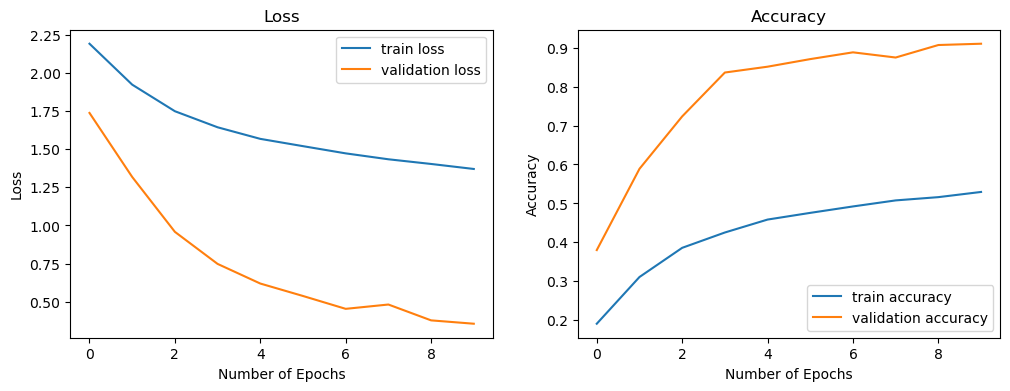

In [31]:
scores_df = plot_loss_and_accuracy(history_kernel3, scores_df, 'Kernel3_model')

In [32]:
reset_seeds()
model_kernel7 = Sequential() 

model_kernel7.add(Conv2D(filters=8, kernel_size=(7,7), padding='Same', activation='relu', input_shape=(28,28,1),)) 
model_kernel7.add(MaxPool2D(pool_size=(2,2))) 
model_kernel7.add(Dropout(0.25)) 
model_kernel7.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu',)) 
model_kernel7.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
model_kernel7.add(Dropout(0.25)) 

model_kernel7.add(Flatten()) 
model_kernel7.add(Dense(256, activation="relu")) 
model_kernel7.add(Dropout(0.5)) 
model_kernel7.add(Dense(10, activation="softmax")) 

In [33]:
# Define the optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model 
model_kernel7.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

In [34]:
history_kernel7 = model_kernel7.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 14s 87ms/step - loss: 2.1758 - accuracy: 0.1925 - val_loss: 1.6226 - val_accuracy: 0.4743
Epoch 2/10
151/151 [==============================] - 14s 91ms/step - loss: 1.8473 - accuracy: 0.3421 - val_loss: 1.1284 - val_accuracy: 0.7217
Epoch 3/10
151/151 [==============================] - 13s 86ms/step - loss: 1.6576 - accuracy: 0.4229 - val_loss: 0.7580 - val_accuracy: 0.8300
Epoch 4/10
151/151 [==============================] - 14s 91ms/step - loss: 1.5566 - accuracy: 0.4643 - val_loss: 0.6358 - val_accuracy: 0.8407
Epoch 5/10
151/151 [==============================] - 13s 86ms/step - loss: 1.4800 - accuracy: 0.4929 - val_loss: 0.5260 - val_accuracy: 0.8640
Epoch 6/10
151/151 [==============================] - 14s 90ms/step - loss: 1.4381 - accuracy: 0.5076 - val_loss: 0.4587 - val_accuracy: 0.8698
Epoch 7/10
151/151 [==============================] - 13s 89ms/step - loss: 1.3932 - accuracy: 0.5289 - val_loss: 0.3964 - val_accuracy:

🎯 Train Accuracy: 0.5550466179847717
🎯 Val Accuracy: 0.9261904954910278


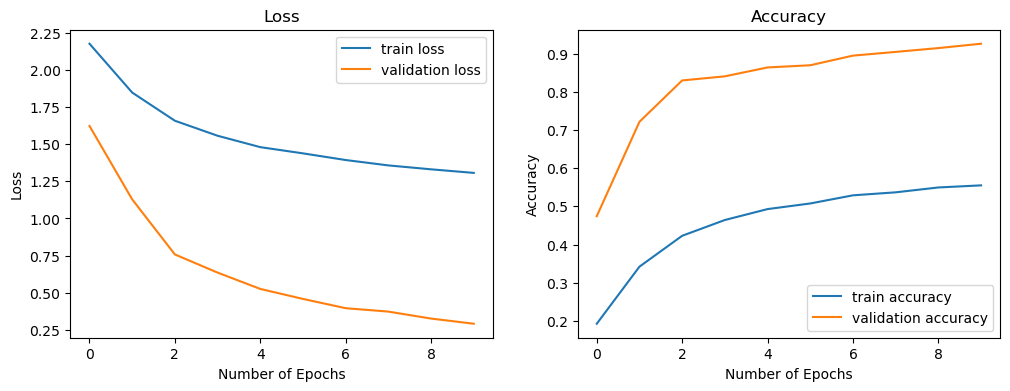

In [35]:
scores_df = plot_loss_and_accuracy(history_kernel7, scores_df, 'Kernel7_model')

In [36]:
reset_seeds()
model_kernel5_7 = Sequential() 

model_kernel5_7.add(Conv2D(filters=8, kernel_size=(5,7), padding='Same', activation='relu', input_shape=(28,28,1),)) 
model_kernel5_7.add(MaxPool2D(pool_size=(2,2))) 
model_kernel5_7.add(Dropout(0.25)) 
model_kernel5_7.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu',)) 
model_kernel5_7.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
model_kernel5_7.add(Dropout(0.25)) 

model_kernel5_7.add(Flatten()) 
model_kernel5_7.add(Dense(256, activation="relu")) 
model_kernel5_7.add(Dropout(0.5)) 
model_kernel5_7.add(Dense(10, activation="softmax")) 

In [37]:
# Define the optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model 
model_kernel5_7.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

In [38]:
history_kernel5_7 = model_kernel5_7.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 14s 90ms/step - loss: 2.1674 - accuracy: 0.1996 - val_loss: 1.6537 - val_accuracy: 0.4488
Epoch 2/10
151/151 [==============================] - 14s 90ms/step - loss: 1.8374 - accuracy: 0.3516 - val_loss: 1.0517 - val_accuracy: 0.7750
Epoch 3/10
151/151 [==============================] - 18s 118ms/step - loss: 1.6446 - accuracy: 0.4271 - val_loss: 0.6999 - val_accuracy: 0.8488
Epoch 4/10
151/151 [==============================] - 12s 77ms/step - loss: 1.5380 - accuracy: 0.4713 - val_loss: 0.5580 - val_accuracy: 0.8771
Epoch 5/10
151/151 [==============================] - 12s 76ms/step - loss: 1.4568 - accuracy: 0.5043 - val_loss: 0.4431 - val_accuracy: 0.8979
Epoch 6/10
151/151 [==============================] - 12s 77ms/step - loss: 1.4132 - accuracy: 0.5149 - val_loss: 0.3997 - val_accuracy: 0.8933
Epoch 7/10
151/151 [==============================] - 12s 77ms/step - loss: 1.3649 - accuracy: 0.5315 - val_loss: 0.3341 - val_accuracy

🎯 Train Accuracy: 0.5674034357070923
🎯 Val Accuracy: 0.9311904907226562


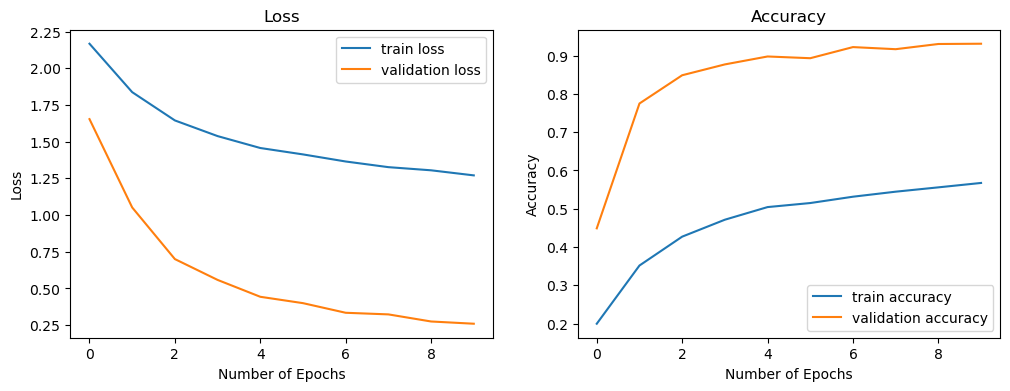

In [39]:
scores_df = plot_loss_and_accuracy(history_kernel5_7, scores_df, 'Kernel5_7_model')

In [40]:
reset_seeds()
model_extra_conv = Sequential() 

model_extra_conv.add(Conv2D(filters=8, kernel_size=(5,7), padding='Same', activation='relu', input_shape=(28,28,1),)) 
model_extra_conv.add(MaxPool2D(pool_size=(2,2))) 
model_extra_conv.add(Dropout(0.25)) 
model_extra_conv.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu',)) 
model_extra_conv.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
model_extra_conv.add(Dropout(0.25)) 
model_extra_conv.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu',)) 
model_extra_conv.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
model_extra_conv.add(Dropout(0.25)) 

model_extra_conv.add(Flatten()) 
model_extra_conv.add(Dense(256, activation="relu")) 
model_extra_conv.add(Dropout(0.5)) 
model_extra_conv.add(Dense(10, activation="softmax")) 

In [41]:
# Define the optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model 
model_extra_conv.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

In [42]:
history_extra_conv = model_extra_conv.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 12s 76ms/step - loss: 2.2133 - accuracy: 0.1693 - val_loss: 1.8374 - val_accuracy: 0.3557
Epoch 2/10
151/151 [==============================] - 12s 77ms/step - loss: 2.0015 - accuracy: 0.2715 - val_loss: 1.3824 - val_accuracy: 0.5879
Epoch 3/10
151/151 [==============================] - 11s 76ms/step - loss: 1.8191 - accuracy: 0.3496 - val_loss: 0.9997 - val_accuracy: 0.7821
Epoch 4/10
151/151 [==============================] - 14s 91ms/step - loss: 1.6942 - accuracy: 0.4003 - val_loss: 0.7585 - val_accuracy: 0.8274
Epoch 5/10
151/151 [==============================] - 14s 92ms/step - loss: 1.6016 - accuracy: 0.4388 - val_loss: 0.5600 - val_accuracy: 0.8724
Epoch 6/10
151/151 [==============================] - 13s 86ms/step - loss: 1.5440 - accuracy: 0.4606 - val_loss: 0.4640 - val_accuracy: 0.8914
Epoch 7/10
151/151 [==============================] - 14s 90ms/step - loss: 1.4755 - accuracy: 0.4859 - val_loss: 0.4467 - val_accuracy:

🎯 Train Accuracy: 0.5209054350852966
🎯 Val Accuracy: 0.9340476393699646


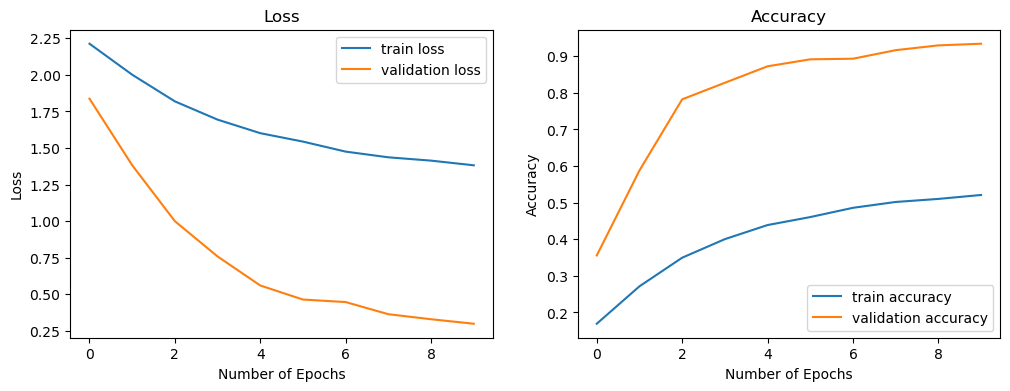

In [43]:
scores_df = plot_loss_and_accuracy(history_extra_conv, scores_df, 'Extra_Conv_model')

In [44]:
scores_df

,model_name,train_accuracy,val_accuracy
0,Adam_model,0.559095,0.925238
1,SGD_model,0.365087,0.650476
2,RMSprop_model,0.539334,0.906190
3,Kernel3_model,0.529427,0.910476
4,Kernel7_model,0.555047,0.926190
5,Kernel5_7_model,0.567403,0.931190
6,Extra_Conv_model,0.520905,0.934048


### <span style="color:#ff5f27">🧬 Data Augmentation </span>

In [45]:
datagen = ImageDataGenerator(
    featurewise_center=False,            # set input mean to 0 over the dataset
    samplewise_center=False,             # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,                 # apply ZCA whitening
    rotation_range=15,                 # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1,                    # Randomly zoom image 
    width_shift_range=0.1,               # randomly shift images horizontally
    height_shift_range=0.1,              # randomly shift images vertically
    horizontal_flip=False,               # randomly flip images
    vertical_flip=False,                 # randomly flip images
)  
datagen.fit(X_train)

In [46]:
reset_seeds()
model_less_augmentation = Sequential() 

model_less_augmentation.add(Conv2D(filters=8, kernel_size=(5,7), padding='Same', activation='relu', input_shape=(28,28,1),)) 
model_less_augmentation.add(MaxPool2D(pool_size=(2,2))) 
model_less_augmentation.add(Dropout(0.25)) 
model_less_augmentation.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu',)) 
model_less_augmentation.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
model_less_augmentation.add(Dropout(0.25)) 
model_less_augmentation.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu',)) 
model_less_augmentation.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) 
model_less_augmentation.add(Dropout(0.25)) 

model_less_augmentation.add(Flatten()) 
model_less_augmentation.add(Dense(256, activation="relu")) 
model_less_augmentation.add(Dropout(0.5)) 
model_less_augmentation.add(Dense(10, activation="softmax")) 

In [47]:
# Define the optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model 
model_less_augmentation.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

In [48]:
history_less_augmentation = model_less_augmentation.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 13s 85ms/step - loss: 1.4882 - accuracy: 0.4760 - val_loss: 0.3108 - val_accuracy: 0.9250
Epoch 2/10
151/151 [==============================] - 14s 91ms/step - loss: 0.6515 - accuracy: 0.7870 - val_loss: 0.1817 - val_accuracy: 0.9521
Epoch 3/10
151/151 [==============================] - 13s 85ms/step - loss: 0.5002 - accuracy: 0.8420 - val_loss: 0.1328 - val_accuracy: 0.9621
Epoch 4/10
151/151 [==============================] - 14s 90ms/step - loss: 0.4189 - accuracy: 0.8677 - val_loss: 0.1179 - val_accuracy: 0.9662
Epoch 5/10
151/151 [==============================] - 13s 85ms/step - loss: 0.3637 - accuracy: 0.8843 - val_loss: 0.1003 - val_accuracy: 0.9714
Epoch 6/10
151/151 [==============================] - 14s 89ms/step - loss: 0.3383 - accuracy: 0.8947 - val_loss: 0.0973 - val_accuracy: 0.9719
Epoch 7/10
151/151 [==============================] - 13s 85ms/step - loss: 0.3127 - accuracy: 0.9032 - val_loss: 0.0853 - val_accuracy:

🎯 Train Accuracy: 0.9160319566726685
🎯 Val Accuracy: 0.9783333539962769


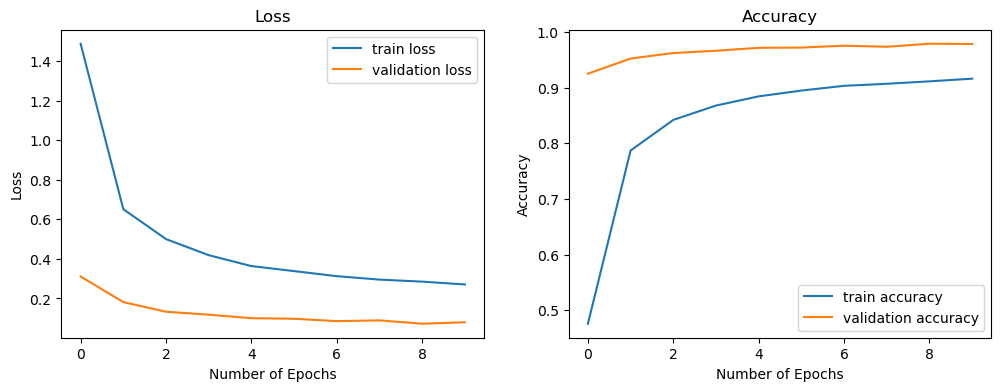

In [49]:
scores_df = plot_loss_and_accuracy(history_less_augmentation, scores_df, 'Less_augmentation_model')

In [50]:
scores_df

,model_name,train_accuracy,val_accuracy
0,Adam_model,0.559095,0.925238
1,SGD_model,0.365087,0.650476
2,RMSprop_model,0.539334,0.906190
3,Kernel3_model,0.529427,0.910476
4,Kernel7_model,0.555047,0.926190
5,Kernel5_7_model,0.567403,0.931190
6,Extra_Conv_model,0.520905,0.934048
7,Less_augmentation_model,0.916032,0.978333


<a name='4'></a>
## <span style="color:#ff5f27">🤖 Final Model </span>
- [🗄️ Table of Contents](#0_0)

### <span style="color:#ff5f27">🧬 Data Augmentation </span>

In [51]:
datagen = ImageDataGenerator(
    featurewise_center=False,            # set input mean to 0 over the dataset
    samplewise_center=False,             # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,                 # apply ZCA whitening
    rotation_range=10,                   # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1,                    # Randomly zoom image 
    width_shift_range=0.1,               # randomly shift images horizontally
    height_shift_range=0.1,              # randomly shift images vertically
    horizontal_flip=False,               # randomly flip images
    vertical_flip=False,                 # randomly flip images
)  
datagen.fit(X_train)

### <span style="color:#ff5f27">👩🏻‍🔬 Model Building </span>

In [52]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5),padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(5,5),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [53]:
# Define the optimizer 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_acc', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001,
)

# Compile the model 
model.compile(
    optimizer=optimizer, 
    loss="categorical_crossentropy", 
    metrics=["accuracy"],
) 

In [54]:
history = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),  
    epochs=EPOCHS, 
    validation_data=(X_val,Y_val), 
    steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
)

Epoch 1/10
151/151 [==============================] - 113s 744ms/step - loss: 0.6479 - accuracy: 0.7817 - val_loss: 0.0932 - val_accuracy: 0.9748
Epoch 2/10
151/151 [==============================] - 113s 745ms/step - loss: 0.1910 - accuracy: 0.9415 - val_loss: 0.0648 - val_accuracy: 0.9800
Epoch 3/10
151/151 [==============================] - 115s 761ms/step - loss: 0.1374 - accuracy: 0.9584 - val_loss: 0.0398 - val_accuracy: 0.9883
Epoch 4/10
151/151 [==============================] - 107s 709ms/step - loss: 0.1129 - accuracy: 0.9664 - val_loss: 0.0508 - val_accuracy: 0.9829
Epoch 5/10
151/151 [==============================] - 111s 737ms/step - loss: 0.0958 - accuracy: 0.9709 - val_loss: 0.0380 - val_accuracy: 0.9886
Epoch 6/10
151/151 [==============================] - 114s 757ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.0274 - val_accuracy: 0.9912
Epoch 7/10
151/151 [==============================] - 113s 746ms/step - loss: 0.0750 - accuracy: 0.9771 - val_loss: 0.0243 -

🎯 Train Accuracy: 0.9797337055206299
🎯 Val Accuracy: 0.9930952191352844


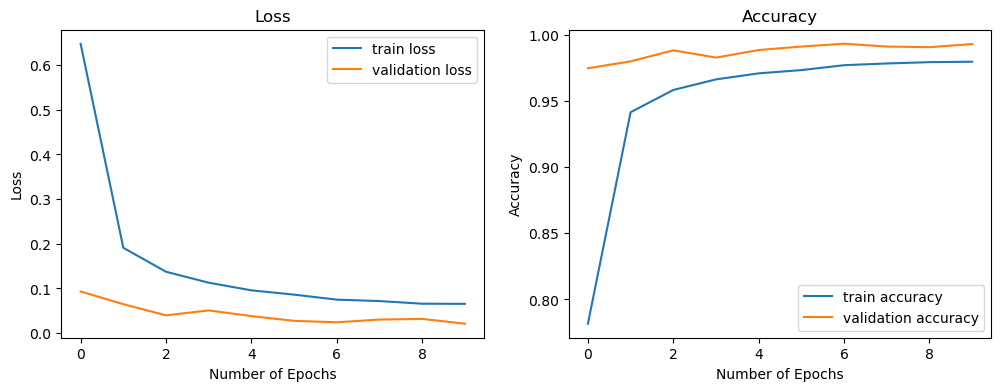

In [55]:
scores_df = plot_loss_and_accuracy(history, scores_df, 'Final_model')

In [56]:
scores_df

,model_name,train_accuracy,val_accuracy
0,Adam_model,0.559095,0.925238
1,SGD_model,0.365087,0.650476
2,RMSprop_model,0.539334,0.906190
3,Kernel3_model,0.529427,0.910476
4,Kernel7_model,0.555047,0.926190
5,Kernel5_7_model,0.567403,0.931190
6,Extra_Conv_model,0.520905,0.934048
7,Less_augmentation_model,0.916032,0.978333
8,Final_model,0.979734,0.993095


<a name='5'></a>
## <span style="color:#ff5f27">👮🏻‍♂️ Model Validation </span>
- [🗄️ Table of Contents](#0_0)

In [57]:
# Predict the values from the validation dataset 
Y_pred = model.predict(X_val) 

# Convert predictions classes to one hot vectors  
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print(f'🔮 Predicted: {Y_pred_classes[:5]}')

# Convert validation observations to one hot vectors 
Y_true = np.argmax(Y_val,axis = 1) 
print(f'⛳️ Real: {Y_true[:5]}')

132/132 [==============================] - 3s 19ms/step
🔮 Predicted: [6 9 5 7 9]
⛳️ Real: [6 9 5 7 9]


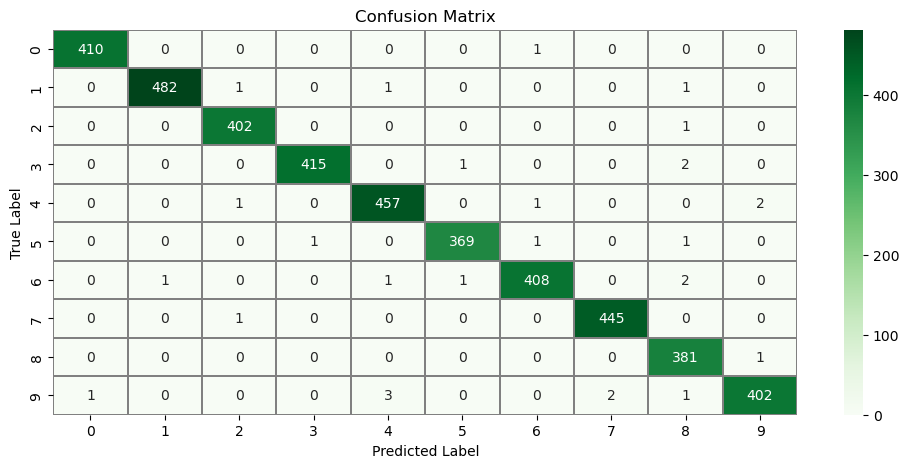

In [58]:
# compute the confusion matrix 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix 
f,ax = plt.subplots(figsize=(12, 5)) 
sns.heatmap(
    confusion_mtx, 
    annot=True, 
    linewidths=0.01,
    cmap="Greens",
    linecolor="gray", 
    fmt='d',
    ax=ax
) 
plt.xlabel("Predicted Label") 
plt.ylabel("True Label") 
plt.title("Confusion Matrix") 
plt.show()

In [59]:
def plot_misclassified_images(X, y_true, y_pred, num_images=6):
    misclassified_indices = (y_true != y_pred).nonzero()[0]
    num_misclassified = min(num_images, len(misclassified_indices))

    rows = (num_misclassified + 2) // 3  # Create 3 columns
    cols = 3

    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

    for i in range(num_misclassified):
        index = misclassified_indices[i]
        ax = axes[i // 3, i % 3] if num_misclassified > 1 else axes  # For single plots
        ax.imshow(X[index].reshape(28, 28), cmap='gray')
        ax.set_title(f'True: {y_true[index]}, Predicted: {y_pred[index]}')
        ax.axis('off')

    plt.show()

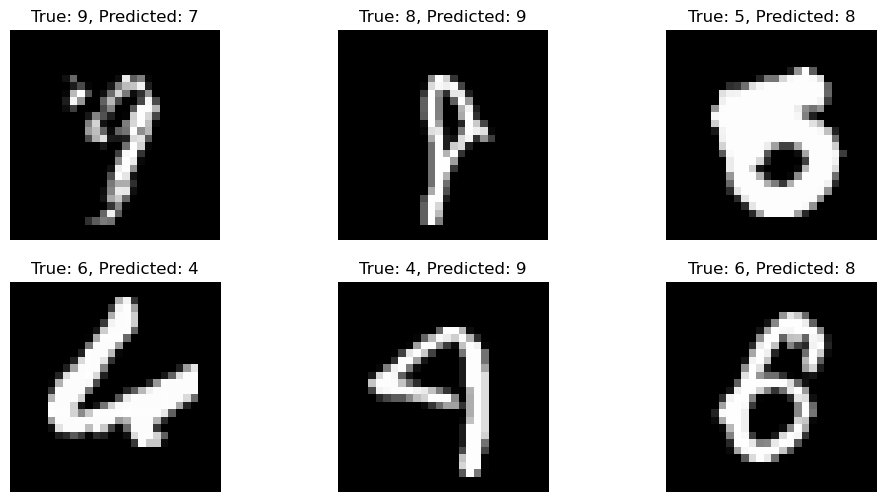

In [60]:
plot_misclassified_images(X_val, Y_true, Y_pred_classes)

---
<a name='6'></a>
## <span style="color:#ff5f27">⚙️ LeNet-5 </span>
- [🗄️ Table of Contents](#0_0)

In [61]:
model = Sequential() 
model.add(
    Conv2D(
        filters=32, 
        kernel_size=(5,5), 
        padding='same', 
        activation='relu', 
        input_shape=(28, 28, 1)
    )
) 
model.add(MaxPool2D(strides=2)) 
model.add(
    Conv2D(
        filters=48, 
        kernel_size=(5,5), 
        padding='valid', 
        activation='relu'
    )
) 
model.add(MaxPool2D(strides=2)) 
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dense(84, activation='relu')) 
model.add(Dense(10, activation='softmax')) 

model.build() 
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 48)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1200)              0         
                                                                 
 dense_18 (Dense)            (None, 256)              

In [62]:
adam = Adam(lr=5e-4) 

model.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer=adam,
) 

In [63]:
# Set a learning rate annealer 
reduce_lr = ReduceLROnPlateau(
    monitor='val_acc', 
    patience=3, 
    verbose=1, 
    factor=0.2, 
    min_lr=1e-6,
) 

In [64]:
# Data Augmentation 
datagen = ImageDataGenerator( 
    rotation_range=10, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    zoom_range=0.1,
) 
datagen.fit(X_train) 

In [65]:
model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=100), 
    steps_per_epoch=len(X_train)/100, 
    epochs=30, 
    validation_data=(X_val, Y_val), 
    callbacks=[reduce_lr ],
) 

Epoch 1/30
378/378 [==============================] - 21s 53ms/step - loss: 0.4708 - accuracy: 0.8522 - val_loss: 0.1050 - val_accuracy: 0.9714 - lr: 5.0000e-04
Epoch 2/30
378/378 [==============================] - 19s 50ms/step - loss: 0.1419 - accuracy: 0.9561 - val_loss: 0.0745 - val_accuracy: 0.9771 - lr: 5.0000e-04
Epoch 3/30
378/378 [==============================] - 20s 52ms/step - loss: 0.1010 - accuracy: 0.9687 - val_loss: 0.0606 - val_accuracy: 0.9817 - lr: 5.0000e-04
Epoch 4/30
378/378 [==============================] - 19s 51ms/step - loss: 0.0808 - accuracy: 0.9747 - val_loss: 0.0451 - val_accuracy: 0.9855 - lr: 5.0000e-04
Epoch 5/30
378/378 [==============================] - 19s 51ms/step - loss: 0.0695 - accuracy: 0.9783 - val_loss: 0.0430 - val_accuracy: 0.9862 - lr: 5.0000e-04
Epoch 6/30
378/378 [==============================] - 20s 52ms/step - loss: 0.0597 - accuracy: 0.9823 - val_loss: 0.0337 - val_accuracy: 0.9900 - lr: 5.0000e-04
Epoch 7/30
378/378 [==============

378/378 [==============================] - 20s 52ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0231 - val_accuracy: 0.9936 - lr: 5.0000e-04
Epoch 22/30
378/378 [==============================] - 19s 50ms/step - loss: 0.0230 - accuracy: 0.9928 - val_loss: 0.0313 - val_accuracy: 0.9907 - lr: 5.0000e-04
Epoch 23/30
378/378 [==============================] - 20s 52ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0234 - val_accuracy: 0.9929 - lr: 5.0000e-04
Epoch 24/30
378/378 [==============================] - 19s 51ms/step - loss: 0.0226 - accuracy: 0.9927 - val_loss: 0.0202 - val_accuracy: 0.9936 - lr: 5.0000e-04
Epoch 25/30
378/378 [==============================] - 19s 51ms/step - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.0226 - val_accuracy: 0.9910 - lr: 5.0000e-04
Epoch 26/30
378/378 [==============================] - 20s 53ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0290 - val_accuracy: 0.9917 - lr: 5.0000e-04
Epoch 27/30
378/378 [===================

In [66]:
score = model.evaluate(X_val, Y_val, batch_size=32)
score

132/132 [==============================] - 1s 4ms/step - loss: 0.0163 - accuracy: 0.9945


[0.01627451740205288, 0.994523823261261]

---